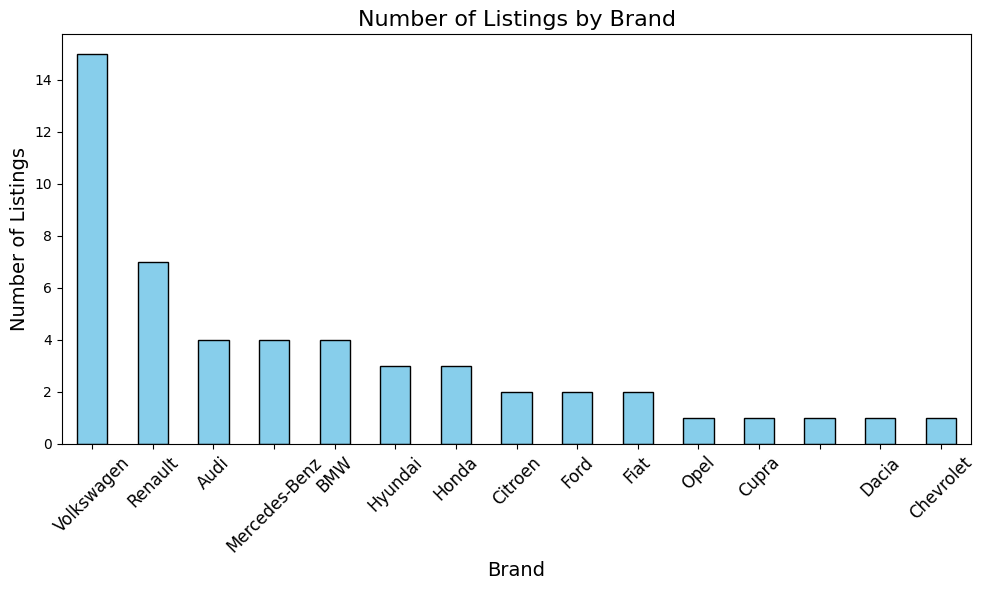

In [1]:
from seleniumbase import Driver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the driver
driver = Driver(uc=True)
url = "https://www.sahibinden.com/"
search_term = "otomobil"

# Open the URL and perform the search
driver.uc_open_with_reconnect(url, 4)
driver.type('//*[@id="searchText"]', search_term)
driver.click('//*[@id="searchSuggestionForm"]/button')
driver.sleep(3)
driver.click('//*[@id="onetrust-accept-btn-handler"]')
driver.click('//*[@title="Otomobil"]')  # Click on "Otomobil"
driver.sleep(3)

driver.wait_for_element_visible('//*[@id="searchResultsSearchForm"]/div/div[3]/div[3]/div[2]/ul/li[2]/a')
driver.click('//*[@id="searchResultsSearchForm"]/div/div[3]/div[3]/div[2]/ul/li[2]/a')
driver.sleep(3)

# Extract item details
item_Brands = driver.find_elements(By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[2]')
item_Seri = driver.find_elements(By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[3]')
item_Model = driver.find_elements(By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[4]')
item_Titles = driver.find_elements(By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[5]')
item_Year = driver.find_elements(By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[6]')
item_Km = driver.find_elements(By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[7]')
item_Prices = driver.find_elements(By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[8]')

# Store data in lists
brands_list = [brand.text for brand in item_Brands]
seri_list = [seri.text for seri in item_Seri]
model_list = [model.text for model in item_Model]
titles_list = [title.text for title in item_Titles]
year_list = [year.text for year in item_Year]
km_list = [km.text for km in item_Km]
prices_list = [price.text for price in item_Prices]

# Create a DataFrame
data = {
    "Brand": brands_list,
    "Seri": seri_list,
    "Model": model_list,
    "Title": titles_list,
    "Year": year_list,
    "KM": km_list,
    "Price": prices_list,
}
df = pd.DataFrame(data)

#Save data to a CSV file
df.to_csv("otomobil_results.csv", index=False)

# Group by brand and count occurrences
brand_counts = df['Brand'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Listings by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the chart
plt.savefig('brand_listings_chart.png')

# Show the chart
plt.show()

# Close the driver
driver.uc_gui_click_captcha()
driver.quit()


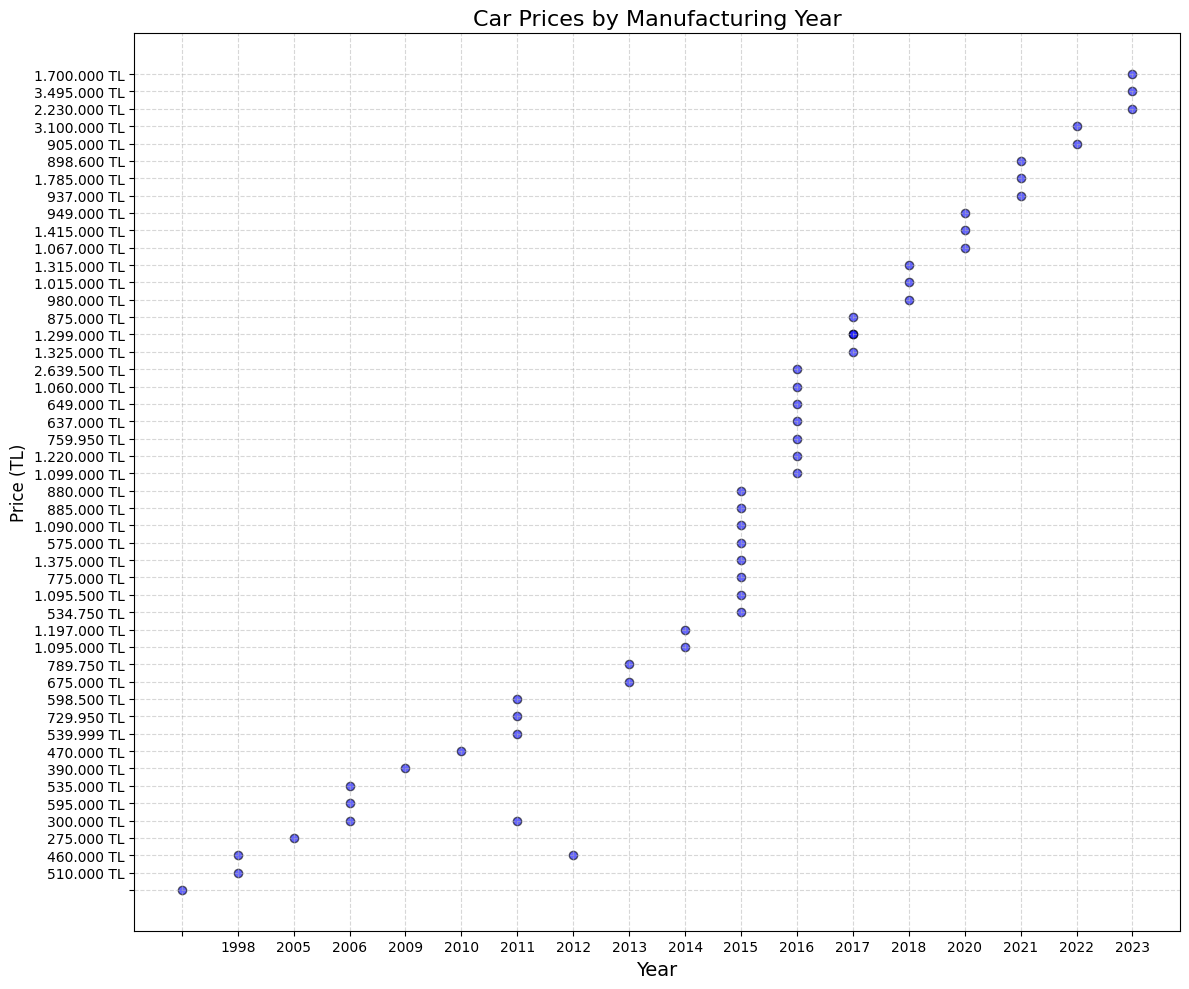

In [2]:
# Drop rows with missing or invalid data
df = df.dropna(subset=["Year", "Price"])
df = df.sort_values(by="Year")
# Scatter Plot: Year vs. Price
plt.figure(figsize=(12, 10))
plt.scatter(df["Year"], df["Price"], alpha=0.6, c="blue", edgecolor="black")
plt.title("Car Prices by Manufacturing Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price (TL)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Save and show the scatter plot
plt.savefig('scatter_plot_year_vs_price.png')
plt.show()